# 참고 유튜브
- 유튜브 AI School
https://youtu.be/XLcwsxXwlNw

# Finance Data Reader 

- 코스피, 코스닥, 미국 주식시장, 코인 등 금융데이터를 크롤링 할 수 있도록 도와주는 파이썬 라이브러리.<br>
https://github.com/financedata-org/FinanceDataReader


## 코랩 한글 설정


In [66]:
# 그래프 한글 표시 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 후 진행하기

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

# Finance Data Reader 설치 및 라이브러리 임포트

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# 폰트설정
plt.rc('font', family='NanumBarunGothic')

## 1_거래소별 종목 리스트 받기

https://github.com/financedata-org/FinanceDataReader/wiki/Quick-Reference

In [4]:
# KRX       : KRX 종목 전체
# KOSPI     : 코스피
# KOSDAQ    : 코스닥

fdr.StockListing('KOSPI')
kospi_list = fdr.StockListing('KOSPI')
kosdaq_list = fdr.StockListing('KOSDAQ')

In [5]:
# 코스피
kospi_list.sample(5)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
648,001560,KR7001560002,제일연마,KOSPI,,10810,2,-60,-0.55,10990,11140,10770,18503,202777720,108100000000,10000000,STK
720,000850,KR7000850008,화천기공,KOSPI,,38100,1,100,0.26,38000,38250,37300,4960,186987600,83820000000,2200000,STK
90,282330,KR7282330000,BGF리테일,KOSPI,,190000,1,2400,1.28,188500,193900,188200,50302,9621087100,3283942140000,17283906,STK
776,004100,KR7004100004,태양금속,KOSPI,,1861,1,34,1.86,1810,1879,1801,630316,1169085581,68298700000,36700000,STK
140,298050,KR7298050006,효성첨단소재,KOSPI,,420500,1,1500,0.36,420000,421500,414000,17211,7180119500,1883818134000,4479948,STK


In [6]:
kospi_list.info()
kospi_list.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         946 non-null    object 
 1   ISU_CD       946 non-null    object 
 2   Name         946 non-null    object 
 3   Market       946 non-null    object 
 4   Dept         946 non-null    object 
 5   Close        946 non-null    object 
 6   ChangeCode   946 non-null    object 
 7   Changes      946 non-null    int64  
 8   ChagesRatio  946 non-null    float64
 9   Open         946 non-null    int64  
 10  High         946 non-null    int64  
 11  Low          946 non-null    int64  
 12  Volume       946 non-null    int64  
 13  Amount       946 non-null    int64  
 14  Marcap       946 non-null    int64  
 15  Stocks       946 non-null    int64  
 16  MarketId     946 non-null    object 
dtypes: float64(1), int64(8), object(8)
memory usage: 125.8+ KB


Code           0
ISU_CD         0
Name           0
Market         0
Dept           0
Close          0
ChangeCode     0
Changes        0
ChagesRatio    0
Open           0
High           0
Low            0
Volume         0
Amount         0
Marcap         0
Stocks         0
MarketId       0
dtype: int64

In [7]:
# 코스닥
kosdaq_list.sample(5)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
1535,017250,KR7017250002,인터엠,KOSDAQ,중견기업부,1277,1,57,4.67,1220,1281,1218,88789,111416913,26875061359,21045467,KSQ
1616,078650,KR7078650009,지나인제약,KOSDAQ,관리종목(소속부없음),2120,0,0,0.00,0,0,0,0,0,8647007240,4078777,KSQ
1273,139050,KR7139050009,시티랩스,KOSDAQ,중견기업부,527,1,11,2.13,516,544,516,402561,215199853,55913923729,106098527,KSQ
1403,002290,KR7002290005,삼일기업공사,KOSDAQ,중견기업부,3470,2,-5,-0.14,3460,3495,3420,19588,67963725,43028000000,12400000,KSQ
383,086890,KR7086890001,이수앱지스,KOSDAQ,기술성장기업부,7020,1,160,2.33,6900,7210,6750,414849,2920266490,232942329360,33182668,KSQ


In [8]:
kosdaq_list.info()
kosdaq_list.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         1633 non-null   object 
 1   ISU_CD       1633 non-null   object 
 2   Name         1633 non-null   object 
 3   Market       1633 non-null   object 
 4   Dept         1633 non-null   object 
 5   Close        1633 non-null   object 
 6   ChangeCode   1633 non-null   object 
 7   Changes      1633 non-null   int64  
 8   ChagesRatio  1633 non-null   float64
 9   Open         1633 non-null   int64  
 10  High         1633 non-null   int64  
 11  Low          1633 non-null   int64  
 12  Volume       1633 non-null   int64  
 13  Amount       1633 non-null   int64  
 14  Marcap       1633 non-null   int64  
 15  Stocks       1633 non-null   int64  
 16  MarketId     1633 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 217.0+ KB


Code           0
ISU_CD         0
Name           0
Market         0
Dept           0
Close          0
ChangeCode     0
Changes        0
ChagesRatio    0
Open           0
High           0
Low            0
Volume         0
Amount         0
Marcap         0
Stocks         0
MarketId       0
dtype: int64

## 2_단일 종목 주가 정보

### **LG전자**😅

In [9]:
# kospi에서 LG전자 종목 찾기

kospi_list[kospi_list['Name'] == 'LG전자']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
17,066570,KR7066570003,LG전자,KOSPI,,116300,1,400,0.35,116700,119700,116100,936668,110583568500,19032240768200,163647814,STK


In [10]:
# LG전자 전체 데이터 (~ 현재)
fdr.DataReader('066570')

# 2020년부터 현재까지
fdr.DataReader('066570', '2020')

# 2020년 01월부터 2023년 01월까지 
fdr.DataReader('066570', '2020-01-01','2023-01-31')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,71800,72100,71000,71000,284758,-0.015257
2020-01-03,71400,71900,70800,71100,369493,0.001408
2020-01-06,70300,70500,69600,69900,337026,-0.016878
2020-01-07,69800,70600,69800,70300,265311,0.005722
2020-01-08,70300,70300,67000,67500,937438,-0.039829
...,...,...,...,...,...,...
2023-01-25,97200,97800,96200,96600,403888,0.003115
2023-01-26,96400,97900,95800,97900,496024,0.013458
2023-01-27,98100,100000,97500,98100,813280,0.002043


<Axes: xlabel='Date'>

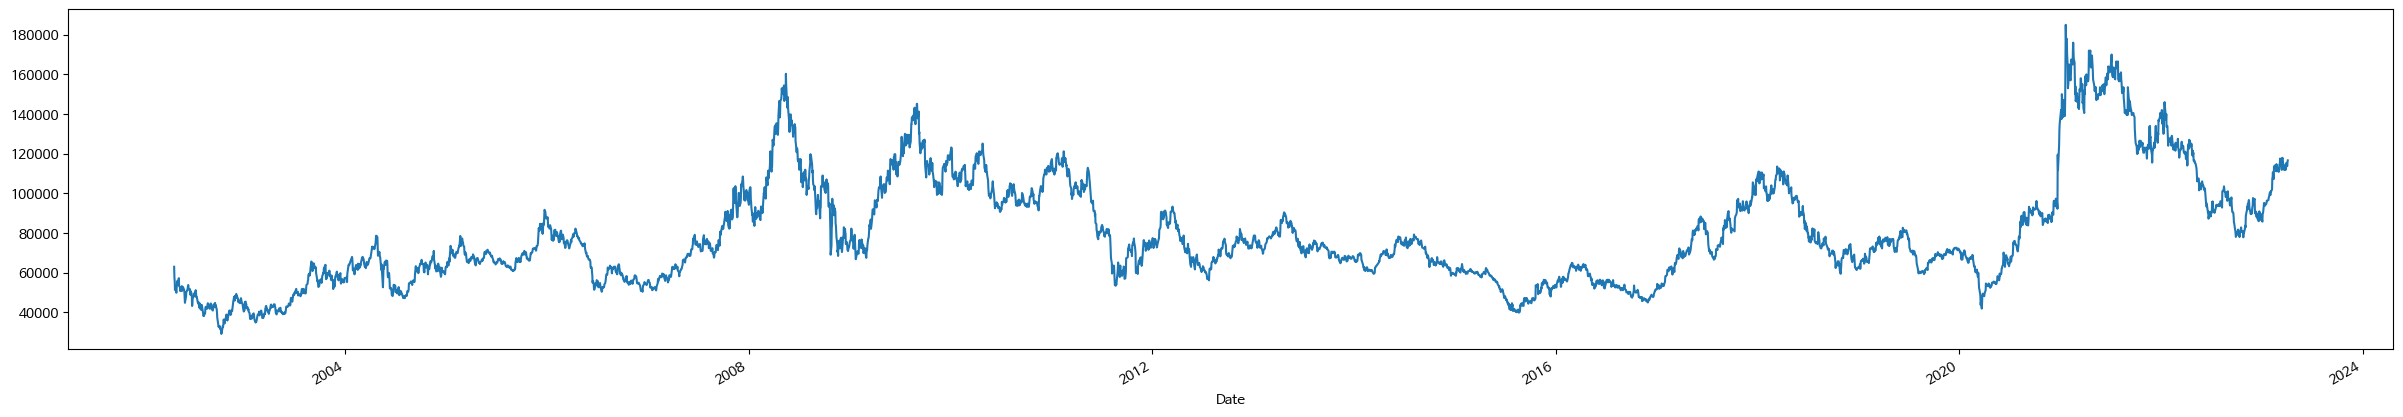

In [11]:
# LG전자 그래프 그리기
df_lg = fdr.DataReader('066570')
df_lg['Close'].plot(figsize = (10, 5))

### 차트 
https://nbviewer.org/gist/FinanceData/c6c336c4727386810bec9264e81f6bba

In [12]:
# 캔들 차트 
# 최근 2020년부터
df_lg2 = fdr.DataReader('066570', '2020-01-01')
fdr.chart.plot(df_lg2, title = 'LG전자(066570)')

In [13]:
# 차트 설정
# fdr.chart.config()를 사용하여 설정을 한번에 지정할 수 있음

config = {'title':'LG전자(066570)', 
          'width': 1500, 
          'height': 500,
          'volume': True,
}

fdr.chart.config(config = config)
fdr.chart.plot(df_lg2)

## 3_여러 종목 주가 받기

In [14]:
kospi_list[kospi_list['Name'].str.contains('카카오|삼성전자|NAVER')]
# kospi_list.query('Name.str.contains("카카오|삼성전자")', engine='python')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63900,1,300,0.47,63700,64000,63400,8333071,530962248500,381469104945000,5969782550,STK
6,005935,KR7005931001,삼성전자우,KOSPI,,53700,3,0,0.00,53300,53800,53200,881969,47256269700,44189015790000,822886700,STK
9,035420,KR7035420009,NAVER,KOSPI,,199200,2,-1800,-0.90,201000,202500,199100,440858,88348761300,32678577732000,164049085,STK
11,035720,KR7035720002,카카오,KOSPI,,60300,2,-400,-0.66,60500,61200,60200,1096152,66512769800,26868982208400,445588428,STK
25,323410,KR7323410001,카카오뱅크,KOSPI,,24300,1,100,0.41,24150,24350,24050,612376,14840638800,11585441429100,476767137,STK
47,377300,KR7377300009,카카오페이,KOSPI,,56200,2,-100,-0.18,56200,56700,55600,220332,12351770500,7513264981800,133687989,STK


In [15]:
# 원하는 종목
stock_list = [
  ["삼성전자", "005930"],
  ["LG전자", "066570"],
  ["카카오", "035720"],
  ["NAVER", "035420"],
]

In [16]:
df = [fdr.DataReader(code, '2020-01-01')['Close'] for name, code in stock_list]
len(df)

4

In [17]:
df

[Date
 2020-01-02    55200
 2020-01-03    55500
 2020-01-06    55500
 2020-01-07    55800
 2020-01-08    56800
               ...  
 2023-03-30    63200
 2023-03-31    64000
 2023-04-03    63100
 2023-04-04    63600
 2023-04-05    63900
 Name: Close, Length: 807, dtype: int64,
 Date
 2020-01-02     71000
 2020-01-03     71100
 2020-01-06     69900
 2020-01-07     70300
 2020-01-08     67500
                ...  
 2023-03-30    113100
 2023-03-31    115300
 2023-04-03    113800
 2023-04-04    115900
 2023-04-05    116600
 Name: Close, Length: 807, dtype: int64,
 Date
 2020-01-02    30609
 2020-01-03    30609
 2020-01-06    31010
 2020-01-07    32114
 2020-01-08    32014
               ...  
 2023-03-30    60100
 2023-03-31    61100
 2023-04-03    60200
 2023-04-04    60700
 2023-04-05    60500
 Name: Close, Length: 807, dtype: int64,
 Date
 2020-01-02    182500
 2020-01-03    181500
 2020-01-06    180500
 2020-01-07    187000
 2020-01-08    183000
                ...  
 2023-03-30    20

In [18]:
# LG전자
# 위에 한번 언급해서 본 내용 맞는지 보기 
df[1]

Date
2020-01-02     71000
2020-01-03     71100
2020-01-06     69900
2020-01-07     70300
2020-01-08     67500
               ...  
2023-03-30    113100
2023-03-31    115300
2023-04-03    113800
2023-04-04    115900
2023-04-05    116600
Name: Close, Length: 807, dtype: int64

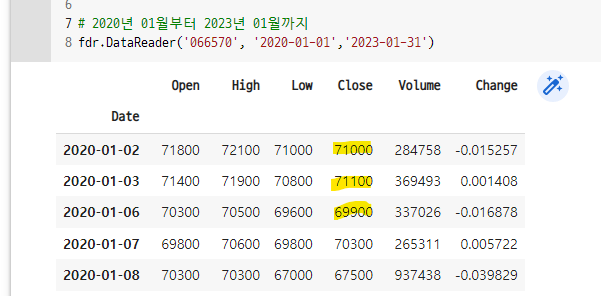

In [19]:
type(df[1])

pandas.core.series.Series

In [20]:
# pd.concat() 으로 합치기

df2 = pd.concat(df, axis=1)
df2.columns =  [name for name, code in stock_list]
df2

,삼성전자,LG전자,카카오,NAVER
Date,,,,
2020-01-02,55200,71000,30609,182500
2020-01-03,55500,71100,30609,181500
2020-01-06,55500,69900,31010,180500
2020-01-07,55800,70300,32114,187000
2020-01-08,56800,67500,32014,183000
...,...,...,...,...
2023-03-30,63200,113100,60100,201000
2023-03-31,64000,115300,61100,202000
2023-04-03,63100,113800,60200,198200


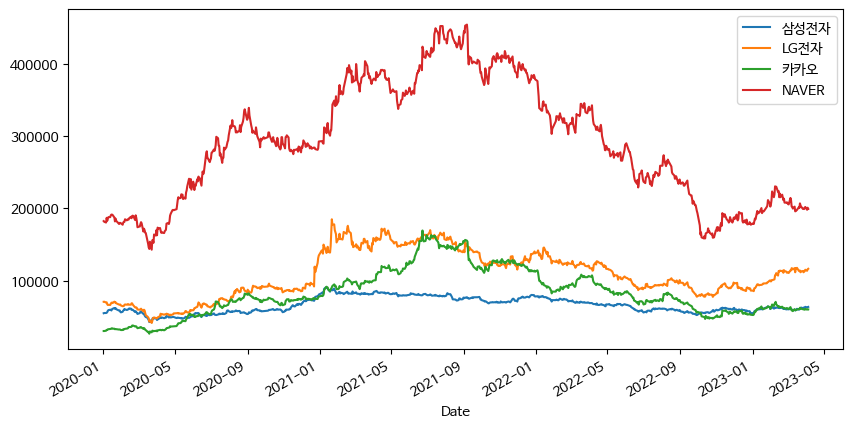

In [25]:
df2.plot(figsize = (10, 5));